In [2]:
import sqlite3
import pandas as pd
!pip install ipython-sql

In [3]:
import math
a = [(5),( 6), (3),(2),(4),(18),(8),(1),(6),(13),(19),(15),(11),(12),(14),(16),(17),(11),(15)]
s = [int(x) for x in a]
k = type(a)

result = [(x, pow(x, 3)) for x in s]
result
X=pd.DataFrame(result,columns=['number','cube'])
X['square']= [( pow(x, 2)) for x in s]
X['Twice']= [(2*x) for x in s]
X['exp']= [(math.exp(x)) for x in s]
X.head()


,number,cube,square,Twice,exp
0,5,125,25,10,148.413159
1,6,216,36,12,403.428793
2,3,27,9,6,20.085537
3,2,8,4,4,7.389056
4,4,64,16,8,54.598150


In [4]:
con=sqlite3.connect('SQL.db')

In [5]:
#X.to_sql('num',con)

In [7]:
%load_ext sql

%sql sqlite:///SQL.db

In [8]:
%%sql

SELECT number , square FROM num limit 5

 * sqlite:///SQL.db
Done.


number,square
5,25
6,36
3,9
2,4
4,16


In [9]:
%%sql

select AVG(number) from num

 * sqlite:///SQL.db
Done.


AVG(number)
10.31578947368421


In [10]:
w=pd.read_sql_query("SELECT number,cube ,square,Twice,exp FROM num  ",con)
w =w.reset_index(drop=True)

w

,number,cube,square,Twice,exp
0,5,125,25,10,1.484132e+02
1,6,216,36,12,4.034288e+02
2,3,27,9,6,2.008554e+01
3,2,8,4,4,7.389056e+00
4,4,64,16,8,5.459815e+01
5,18,5832,324,36,6.565997e+07
6,8,512,64,16,2.980958e+03
7,1,1,1,2,2.718282e+00
8,6,216,36,12,4.034288e+02
9,13,2197,169,26,4.424134e+05


In [11]:
w=pd.read_sql_query("select number ,cube From num where number >7 ",con)
w

,number,cube
0,18,5832
1,8,512
2,13,2197
3,19,6859
4,15,3375
5,11,1331
6,12,1728
7,14,2744
8,16,4096
9,17,4913


In [12]:
w=pd.read_sql_query("select number ,cube ,count(number) as time From num group by number",con)
w

,number,cube,time
0,1,1,1
1,2,8,1
2,3,27,1
3,4,64,1
4,5,125,1
5,6,216,2
6,8,512,1
7,11,1331,2
8,12,1728,1
9,13,2197,1


In [13]:
w=pd.read_sql_query("select number ,cube   From num where cube>500 and square >100 and Twice>30",con)
w

,number,cube
0,18,5832
1,19,6859
2,16,4096
3,17,4913


In [14]:
w=pd.read_sql_query("select number ,square  From num where square > (select avg(square) from num ) ",con)
w

,number,square
0,18,324
1,13,169
2,19,361
3,15,225
4,12,144
5,14,196
6,16,256
7,17,289
8,15,225


In [15]:
w=pd.read_sql_query("select avg(square) from num  ",con)
w

,avg(square)
0,138.0


In [16]:
w=pd.read_sql_query("select sum(square) from num  ",con)
w

,sum(square)
0,2622


In [17]:
w=pd.read_sql_query("select number,square from num where square % 2 = 0 ",con)
w

,number,square
0,6,36
1,2,4
2,4,16
3,18,324
4,8,64
5,6,36
6,12,144
7,14,196
8,16,256


In [35]:
d=pd.read_sql_query("select number,cube from num where cube % 2 is not 0 ",con)
d

,number,cube
0,5,125
1,3,27
2,1,1
3,13,2197
4,19,6859
5,15,3375
6,11,1331
7,17,4913
8,11,1331
9,15,3375


In [43]:
s=pd.read_sql_query("select number ,square  From num where number <(select number from num where number % 2 = 0 ) ",con)
s 

,number,square
0,5,25
1,3,9
2,2,4
3,4,16
4,1,1


In [20]:
w=pd.read_sql_query("SELECT number,Twice FROM num WHERE number > 10 AND number % 2 = 0",con)
w

,number,Twice
0,18,36
1,12,24
2,14,28
3,16,32


# select number ,cube From num group by number

In [26]:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

<function matplotlib.pyplot.show(close=None, block=None)>

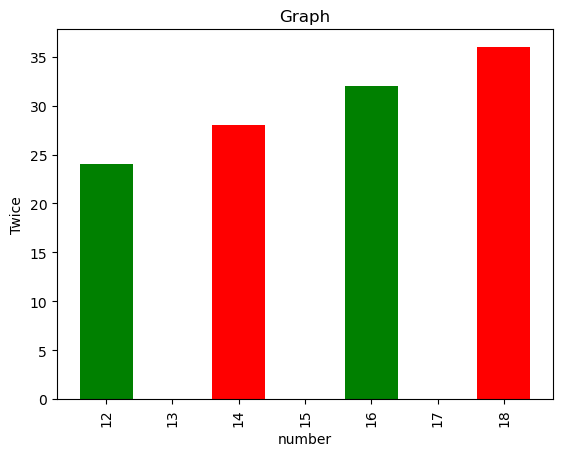

In [38]:
plt.pyplot.bar(x=w['number'],height=w['Twice'],color = ['red','green'])
plt.pyplot.xlabel('number')
plt.pyplot.ylabel('Twice')
plt.pyplot.title('Graph')
plt.pyplot.xticks(rotation=90)
plt.pyplot.show

(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([12. , 12.6, 13.2, 13.8, 14.4, 15. , 15.6, 16.2, 16.8, 17.4, 18. ]),
 <BarContainer object of 10 artists>)

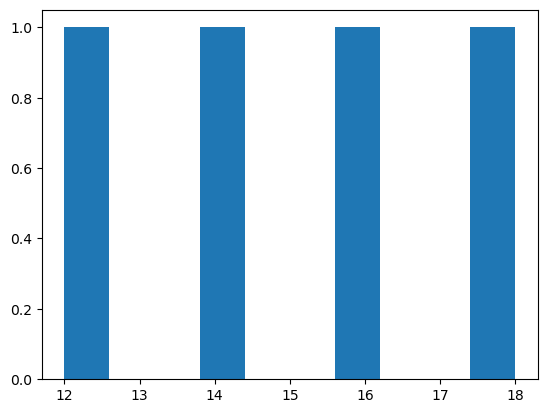

In [31]:
plt.pyplot.hist(w["number"])

Text(0.5, 1.0, 'Graph')

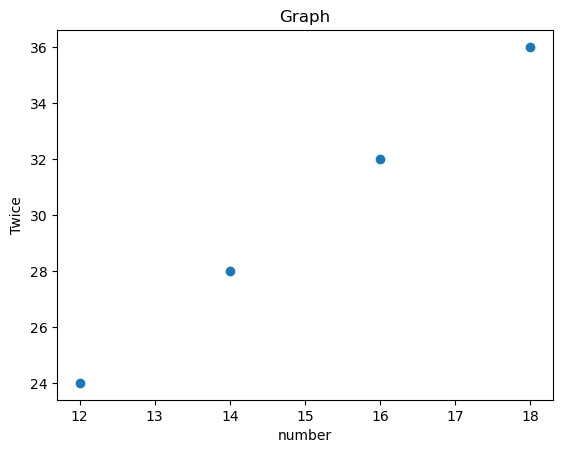

In [34]:
plt.pyplot.scatter(w["number"],w["Twice"])
plt.pyplot.xlabel('number')
plt.pyplot.ylabel('Twice')
plt.pyplot.title('Graph')

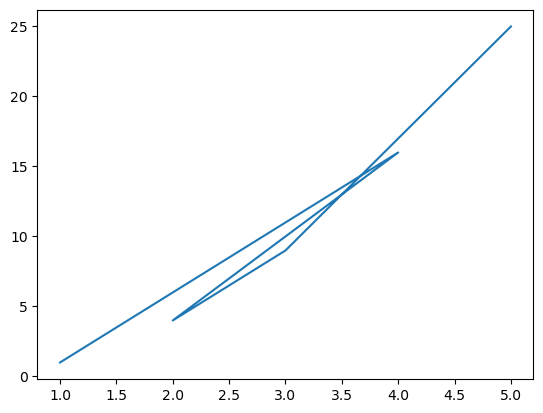

In [44]:
plt.pyplot.plot(s["number"],s["square"])

<AxesSubplot:xlabel='number', ylabel='square'>

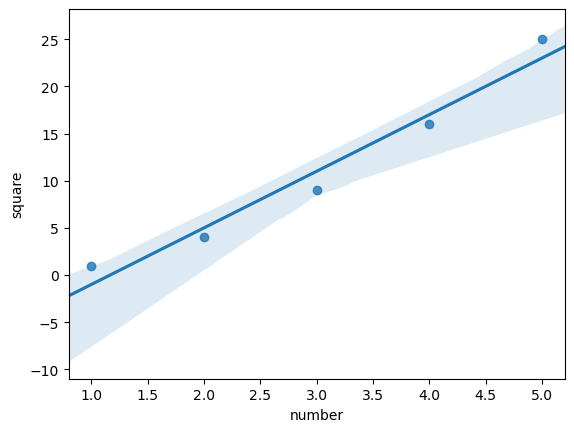

In [49]:
#import piplite
#await piplite.install(['seaborn'])
import seaborn as sns


sns.regplot(x='number',y='square',data=s)

Text(0.5, 1.0, 'Graph')

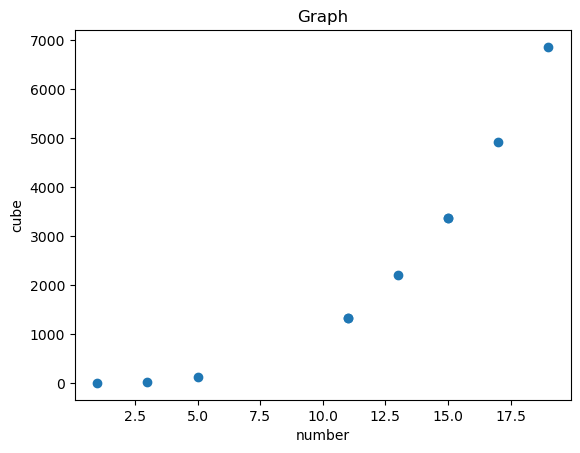

In [36]:
plt.pyplot.scatter(d["number"],d["cube"])
plt.pyplot.xlabel('number')
plt.pyplot.ylabel('cube')
plt.pyplot.title('Graph')

In [41]:
w=pd.read_sql_query('select number,cube,square,Twice,exp from num',con)
w

,number,cube,square,Twice,exp
0,5,125,25,10,1.484132e+02
1,6,216,36,12,4.034288e+02
2,3,27,9,6,2.008554e+01
3,2,8,4,4,7.389056e+00
4,4,64,16,8,5.459815e+01
5,18,5832,324,36,6.565997e+07
6,8,512,64,16,2.980958e+03
7,1,1,1,2,2.718282e+00
8,6,216,36,12,4.034288e+02
9,13,2197,169,26,4.424134e+05


In [55]:
k=pd.read_sql_query('select number from num where cube%2=0 and Twice %2 =0',con)
k

,number
0,6
1,2
2,4
3,18
4,8
5,6
6,12
7,14
8,16


In [61]:
k=pd.read_sql_query("SELECT number FROM (SELECT * FROM num WHERE cube % 2 = 0) AS inner_query WHERE Twice % 2 = 0",con)
k

,number
0,6
1,2
2,4
3,18
4,8
5,6
6,12
7,14
8,16


In [75]:
'''w=pd.read_sql_query("select number from num where Twice =

      (select square from num)",con)'''


w

,number


In [74]:
w = pd.read_sql_query("SELECT number FROM num WHERE Twice = (SELECT square FROM num LIMIT 1)", con)
print(w)


Empty DataFrame
Columns: [number]
Index: []
